In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install yfinance mplfinance
!pip install ta
import ta
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mplfinance as mpf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=935e177ba1e7ae179ef430b1f7786f2ae3702d60c1d1401f775f1cf40ec85593
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
tickers = ['NVDA', 'META', 'TSLA', 'JPM', 'AMZN']
start_date = '2023-01-01'
end_date = '2025-05-18'

In [ ]:
# Tải dữ liệu từ Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)

# Chuyển đổi dữ liệu về định dạng DataFrame đơn giản hơn
df = pd.DataFrame()
for ticker in tickers:
    df_ticker = data.loc[:, pd.IndexSlice[:, ticker]]
    df_ticker.columns = df_ticker.columns.droplevel(1)
    df_ticker = df_ticker.rename(columns=lambda col: f'{col}_{ticker}')
    df = pd.concat([df, df_ticker], axis=1)

# Thêm cột ngày
df['Date'] = data.index
df = df.set_index('Date')
df.head()

[*********************100%***********************]  5 of 5 completed


Price,Adj Close_NVDA,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA,Adj Close_META,Close_META,High_META,Low_META,...,High_JPM,Low_JPM,Open_JPM,Volume_JPM,Adj Close_AMZN,Close_AMZN,High_AMZN,Low_AMZN,Open_AMZN,Volume_AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,14.303278,14.315,14.996,14.096,14.851,401277000,124.154854,124.739998,126.370003,122.279999,...,136.740005,133.889999,135.240005,11054800,85.820000,85.820000,86.959999,84.209999,85.459999,76706000
2023-01-04,14.736923,14.749,14.853,14.241,14.567,431324000,126.772522,127.370003,129.050003,125.849998,...,137.679993,135.570007,135.990005,11687600,85.139999,85.139999,86.980003,83.360001,86.550003,68885100
2023-01-05,14.253321,14.265,14.564,14.148,14.491,389168000,126.344536,126.940002,128.520004,124.540001,...,135.710007,133.699997,135.660004,8381300,83.120003,83.120003,85.419998,83.070000,85.330002,67930800
2023-01-06,14.846834,14.859,15.010,14.034,14.474,405044000,129.410095,130.020004,130.330002,126.040001,...,138.380005,134.490005,136.130005,10029100,86.080002,86.080002,86.400002,81.430000,83.029999,83303400
2023-01-09,15.615206,15.628,16.056,15.141,15.284,504231000,128.862656,129.470001,132.949997,129.279999,...,138.880005,136.880005,138.600006,8482300,87.360001,87.360001,89.480003,87.080002,87.459999,65266100


In [ ]:
etf_data_mask = {}

for ticker in tickers:
    try:
        df_ticker = pd.DataFrame({
            'open': df[f'Open_{ticker}'],
            'high': df[f'High_{ticker}'],
            'low': df[f'Low_{ticker}'],
            'close': df[f'Close_{ticker}'],
            'adj_close': df[f'Adj Close_{ticker}'],
            'volume': df[f'Volume_{ticker}']
        })

        df_ticker = df_ticker.sort_index()
        etf_data_mask[ticker] = df_ticker

        print(f"===== {ticker} =====")
        print(df_ticker.tail())

    except KeyError:
        print(f"Thiếu dữ liệu cho {ticker}, bỏ qua.")

===== NVDA =====
                  open        high         low       close   adj_close  \
Date                                                                     
2025-05-12  121.970001  123.000000  120.279999  123.000000  123.000000   
2025-05-13  124.980003  131.220001  124.470001  129.929993  129.929993   
2025-05-14  133.199997  135.440002  131.679993  135.339996  135.339996   
2025-05-15  134.289993  136.300003  132.660004  134.830002  134.830002   
2025-05-16  136.220001  136.350006  133.460007  135.399994  135.399994   

               volume  
Date                   
2025-05-12  225023300  
2025-05-13  330430100  
2025-05-14  281180800  
2025-05-15  226632600  
2025-05-16  226542500  
===== META =====
                  open        high         low       close   adj_close  \
Date                                                                     
2025-05-12  630.919983  640.390015  621.030029  639.429993  639.429993   
2025-05-13  645.539978  660.919983  642.830017  656.03002

In [ ]:
# Tính chỉ báo kỹ thuật cho mỗi mã
for ticker in tickers:
    if ticker in etf_data_mask:
        df_ticker = etf_data_mask[ticker]

        # Tính RSI
        df_ticker['RSI'] = ta.momentum.RSIIndicator(df_ticker['close'], window=14).rsi()

        # Tính MACD
        macd = ta.trend.MACD(df_ticker['close'])
        df_ticker['MACD'] = macd.macd()
        df_ticker['MACD_signal'] = macd.macd_signal()

        # Tính MA20, MA50
        df_ticker['MA20'] = df_ticker['close'].rolling(window=20).mean()
        df_ticker['MA50'] = df_ticker['close'].rolling(window=50).mean()

        etf_data_mask[ticker] = df_ticker


Trục X: thời gian (ngày giao dịch)

Trục Y: ΔClose — tức sự thay đổi giá đóng cửa giữa ngày hôm đó và ngày trước đó

Nếu ΔClose > 0 → Giá tăng

Nếu ΔClose < 0 → Giá giảm

Mỗi cột dọc là một ngày giao dịch, thể hiện mức tăng/giảm giá

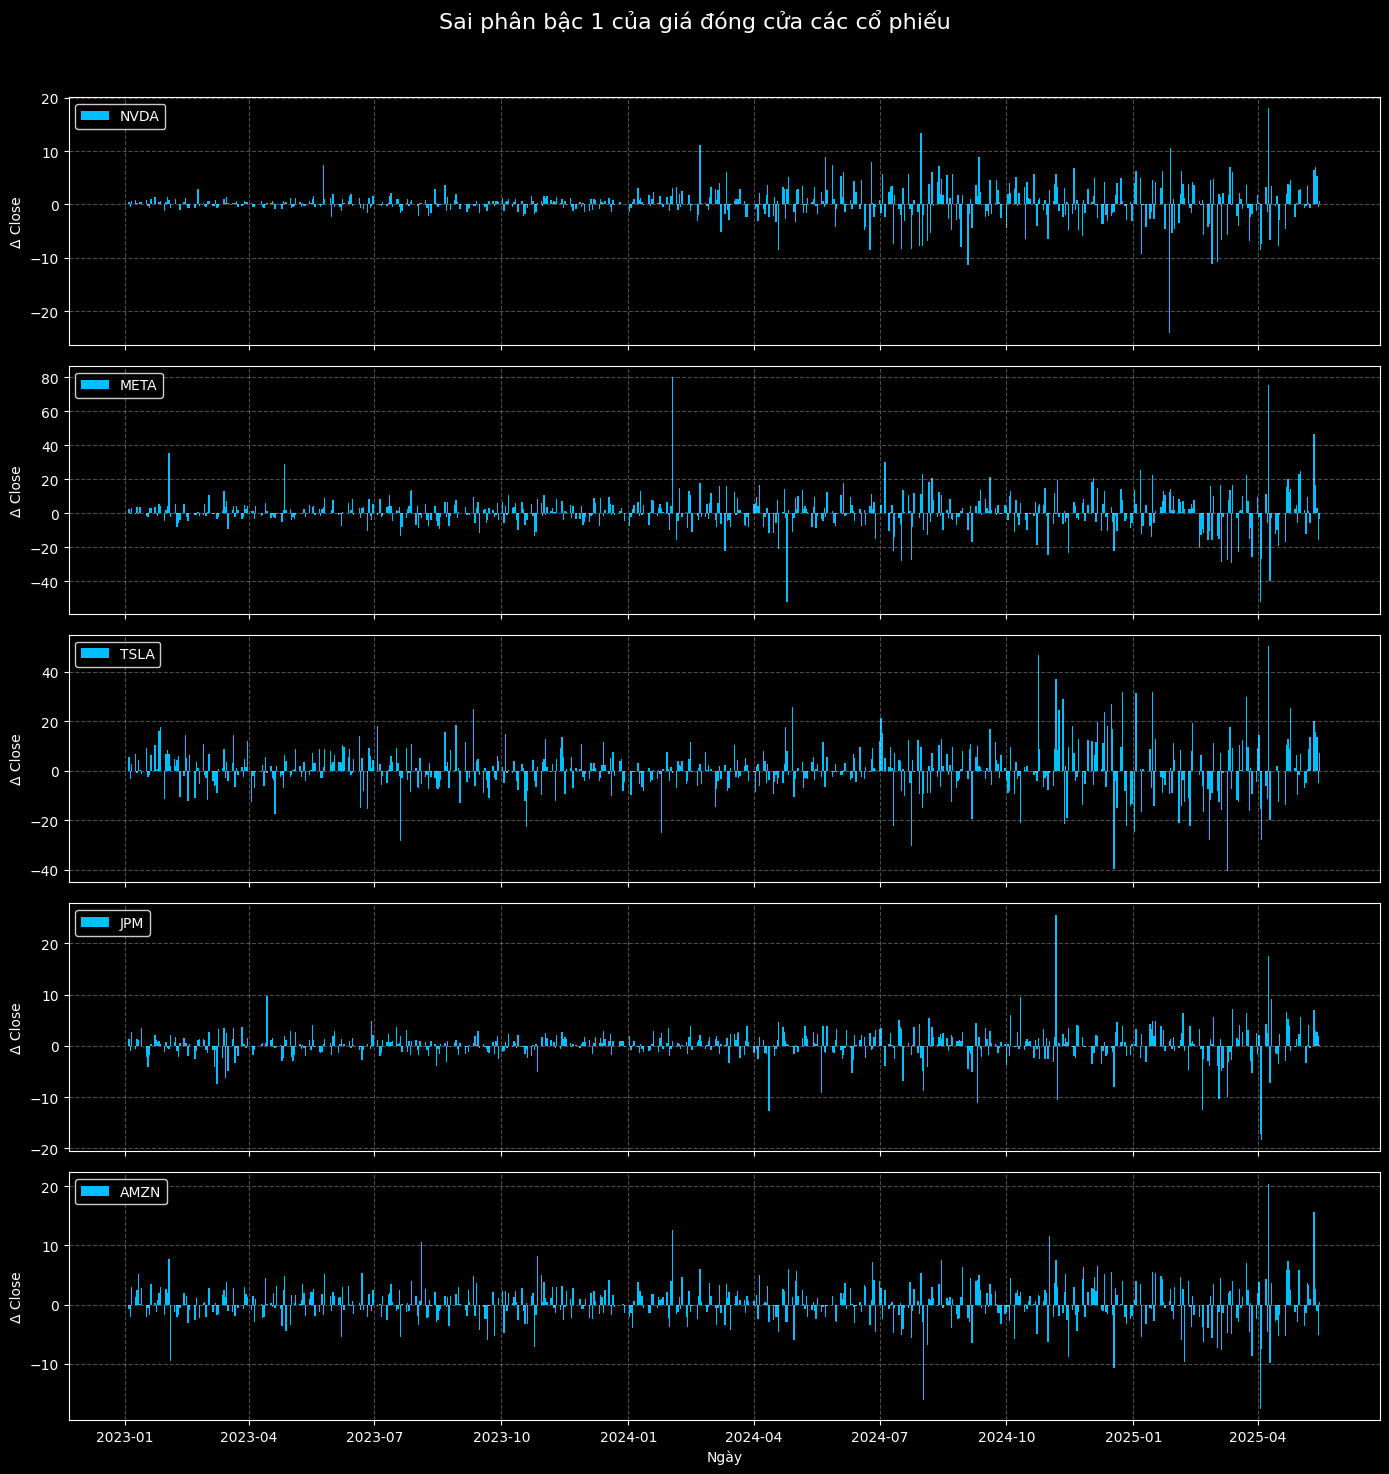

In [ ]:
plt.style.use('dark_background')

fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(14, 3 * len(tickers)), sharex=True)

for i, ticker in enumerate(tickers):
    try:
        close_prices = df[f'Close_{ticker}']
        first_order_diff = close_prices.diff()
        ax = axes[i]

        ax.bar(first_order_diff.loc[start_date:end_date].index,
               first_order_diff.loc[start_date:end_date],
               width=1.0, color='deepskyblue', label=f'{ticker}')

        ax.set_ylabel('Δ Close', color='white')
        ax.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
        ax.grid(True, linestyle='--', alpha=0.3)

        ax.tick_params(colors='white')
        ax.spines['top'].set_color('white')
        ax.spines['bottom'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.spines['right'].set_color('white')

    except KeyError:
        print(f"Dữ liệu thiếu cho {ticker}, bỏ qua.")
        continue

axes[-1].set_xlabel('Ngày', color='white')
plt.suptitle('Sai phân bậc 1 của giá đóng cửa các cổ phiếu', fontsize=16, color='white')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
fig.autofmt_xdate()

<ipython-input-15-3befe7a1674b>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=df_ticker, x='Weekday_Name', y='close', palette=palette)
<ipython-input-15-3befe7a1674b>:27: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  box_plot = sns.boxplot(data=df_ticker, x='Weekday_Name', y='close', palette=palette)


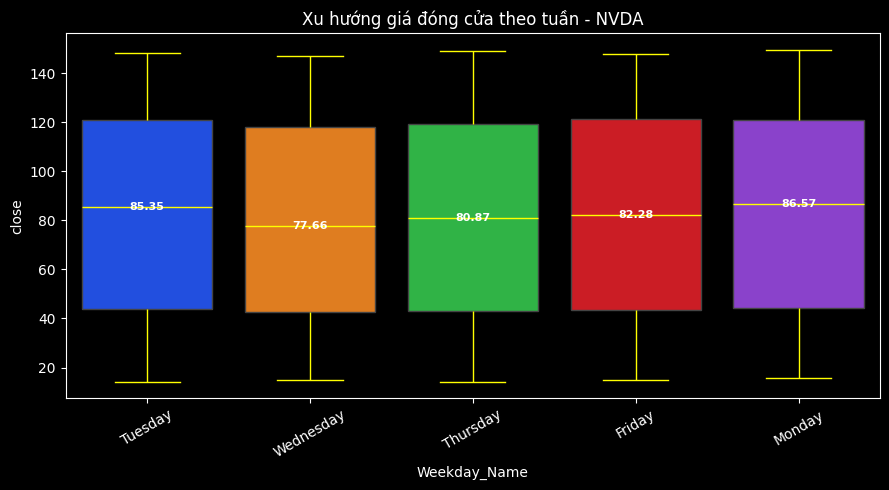

<ipython-input-15-3befe7a1674b>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=df_ticker, x='Weekday_Name', y='close', palette=palette)
<ipython-input-15-3befe7a1674b>:27: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  box_plot = sns.boxplot(data=df_ticker, x='Weekday_Name', y='close', palette=palette)


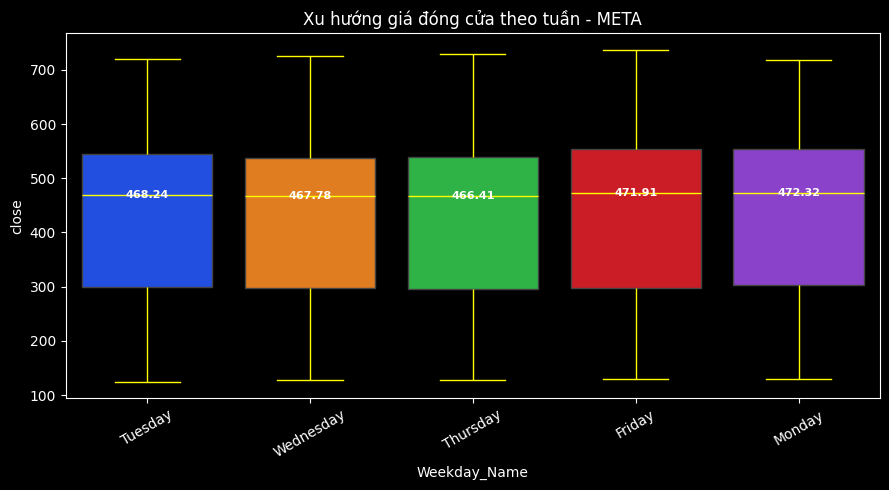

<ipython-input-15-3befe7a1674b>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=df_ticker, x='Weekday_Name', y='close', palette=palette)
<ipython-input-15-3befe7a1674b>:27: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  box_plot = sns.boxplot(data=df_ticker, x='Weekday_Name', y='close', palette=palette)


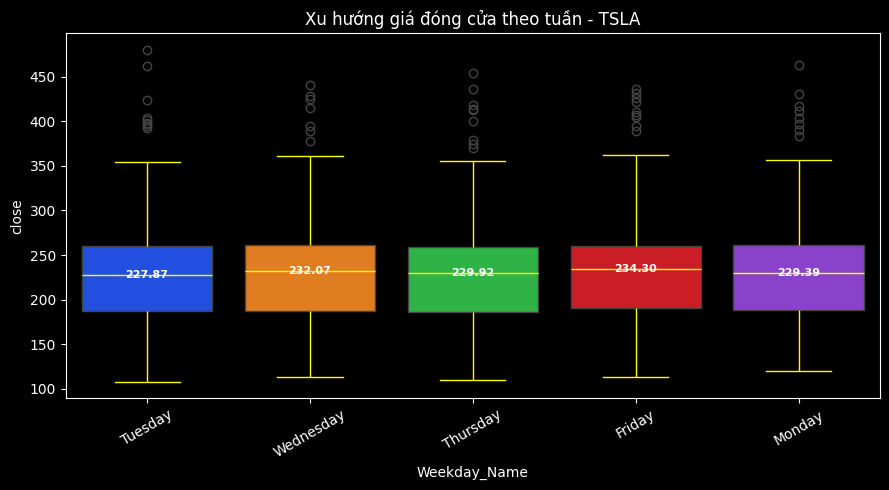

<ipython-input-15-3befe7a1674b>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=df_ticker, x='Weekday_Name', y='close', palette=palette)
<ipython-input-15-3befe7a1674b>:27: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  box_plot = sns.boxplot(data=df_ticker, x='Weekday_Name', y='close', palette=palette)


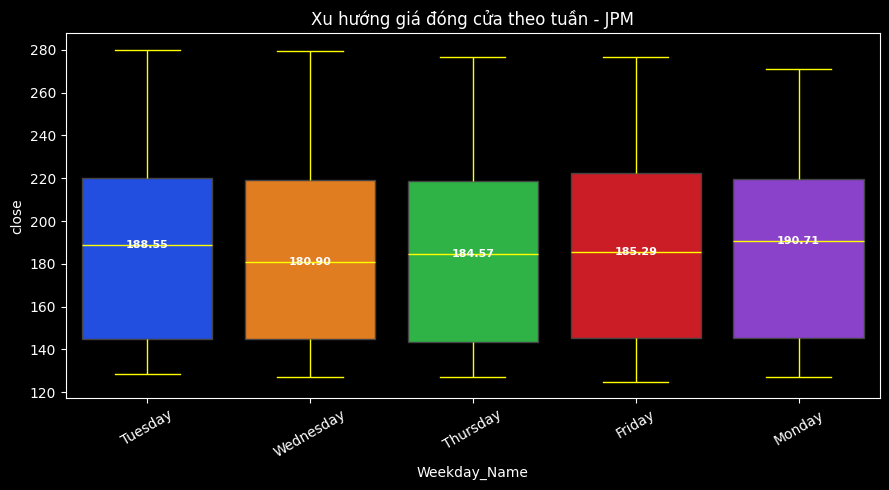

<ipython-input-15-3befe7a1674b>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=df_ticker, x='Weekday_Name', y='close', palette=palette)
<ipython-input-15-3befe7a1674b>:27: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  box_plot = sns.boxplot(data=df_ticker, x='Weekday_Name', y='close', palette=palette)


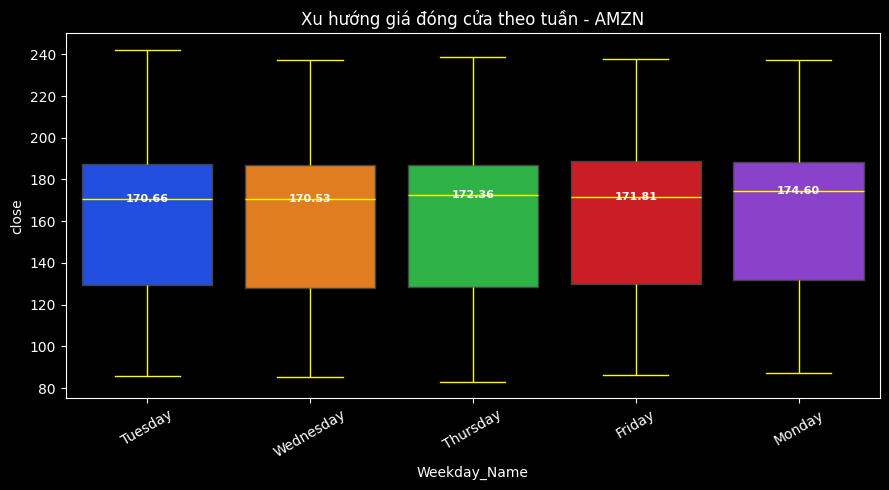

In [ ]:
def add_median_labels(ax):
    """Hiển thị median trên từng boxplot."""
    lines = ax.lines
    for i in range(0, len(lines), 6):
        median = lines[i + 4].get_ydata()[0]
        ax.text(i//6, median, f'{median:.2f}', ha='center', va='center',
                fontweight='bold', fontsize=8, color='white')

def set_whisker_color(ax, color='yellow'):
    """Đặt màu cho tất cả các phần đường dọc và cap (whiskers + caps)."""
    for line in ax.lines:
        line.set_color(color)

# Vẽ boxplot cho từng cổ phiếu
for ticker in tickers:
    try:
        df_ticker = etf_data_mask[ticker].copy()
        df_ticker['Weekday_Name'] = df_ticker.index.day_name()
        df_ticker['Year'] = df_ticker.index.year
        df_ticker['Month'] = df_ticker.index.month
        df_ticker['Hour'] = df_ticker.index.hour

        plt.figure(figsize=(9, 5))
        plt.style.use('dark_background')
        palette = sns.color_palette("bright")

        box_plot = sns.boxplot(data=df_ticker, x='Weekday_Name', y='close', palette=palette)
        box_plot.set_title(f'Xu hướng giá đóng cửa theo tuần - {ticker}', color='white')
        box_plot.tick_params(axis='x', rotation=30, colors='white')
        box_plot.tick_params(axis='y', colors='white')

        add_median_labels(box_plot)
        set_whisker_color(box_plot, color='yellow')

        plt.tight_layout()
        plt.show()

    except KeyError:
        print(f"Dữ liệu thiếu cho {ticker}, bỏ qua.")


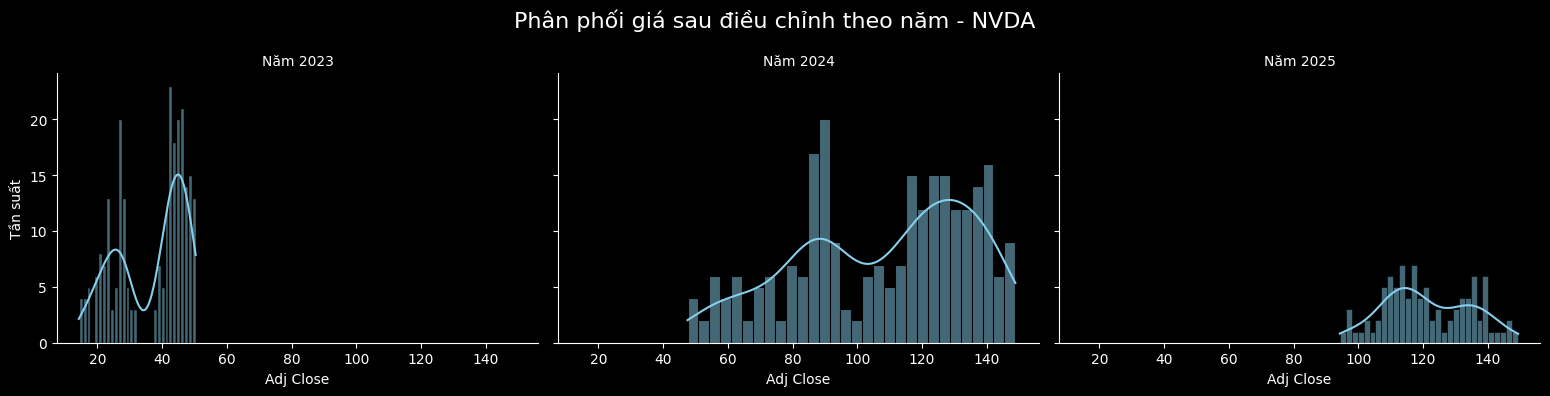

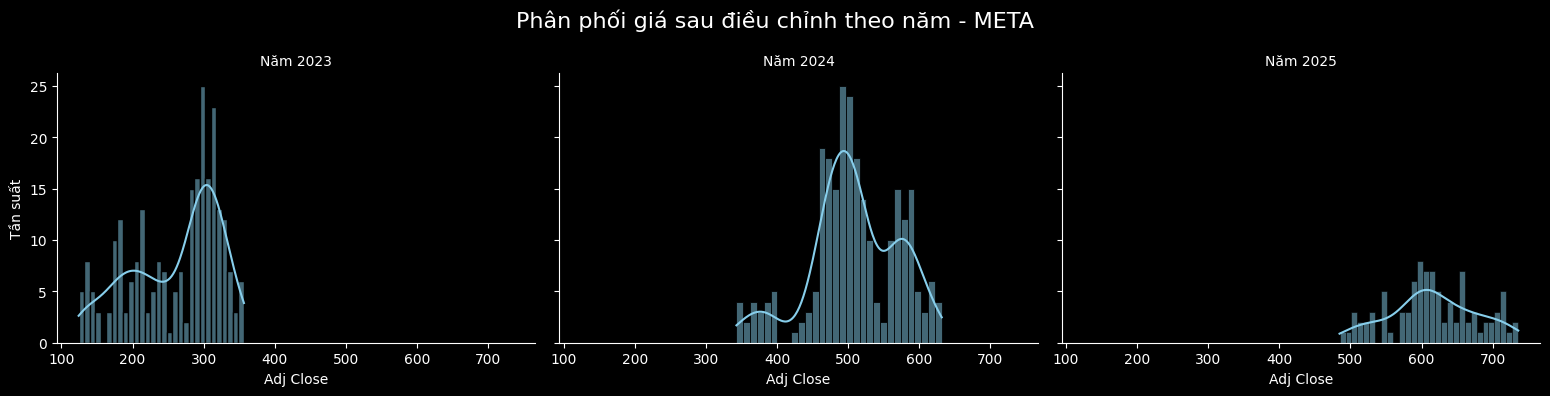

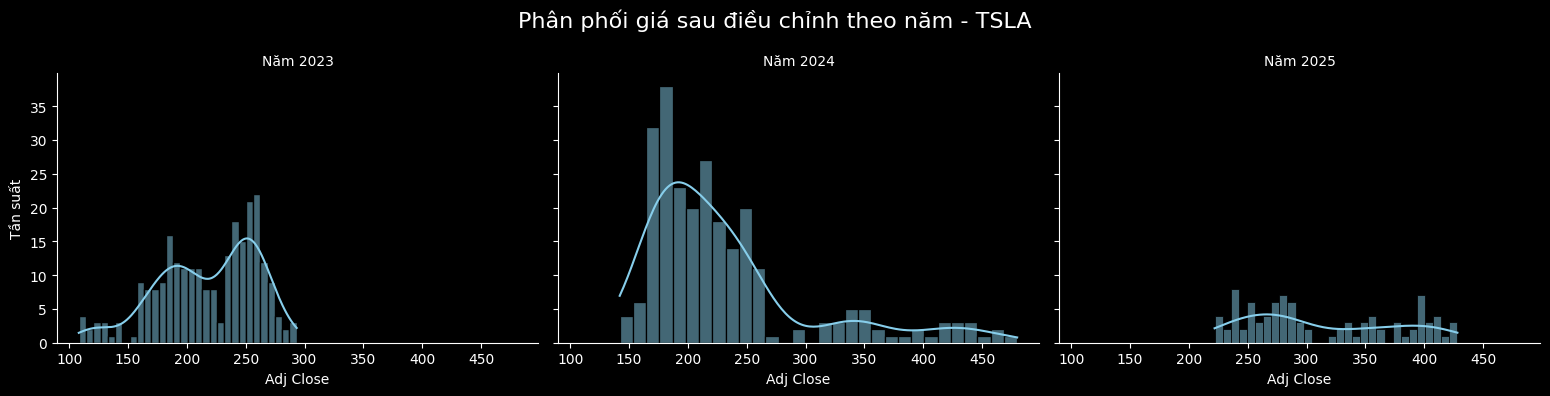

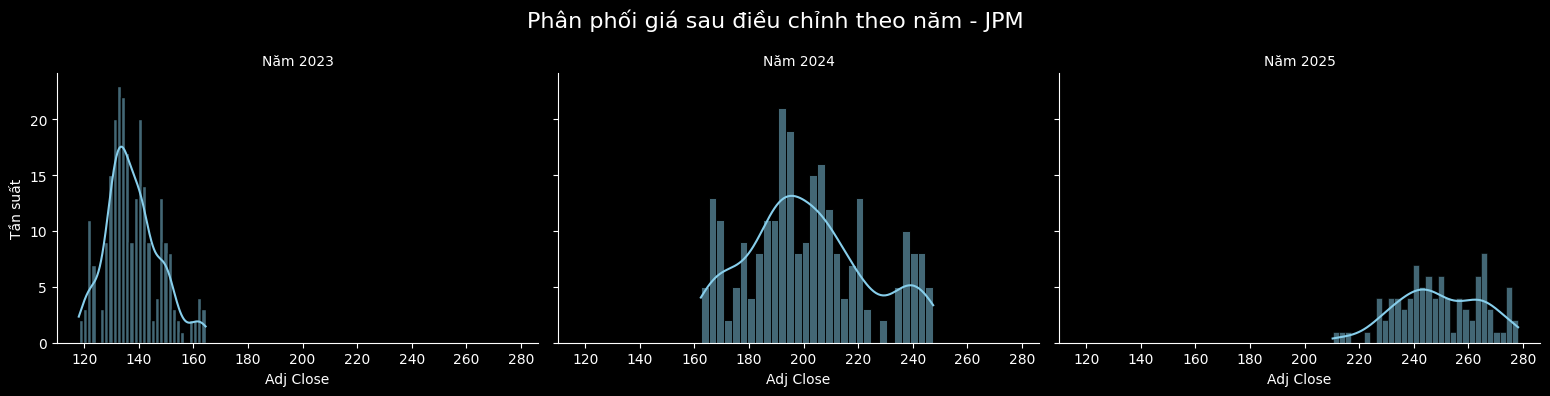

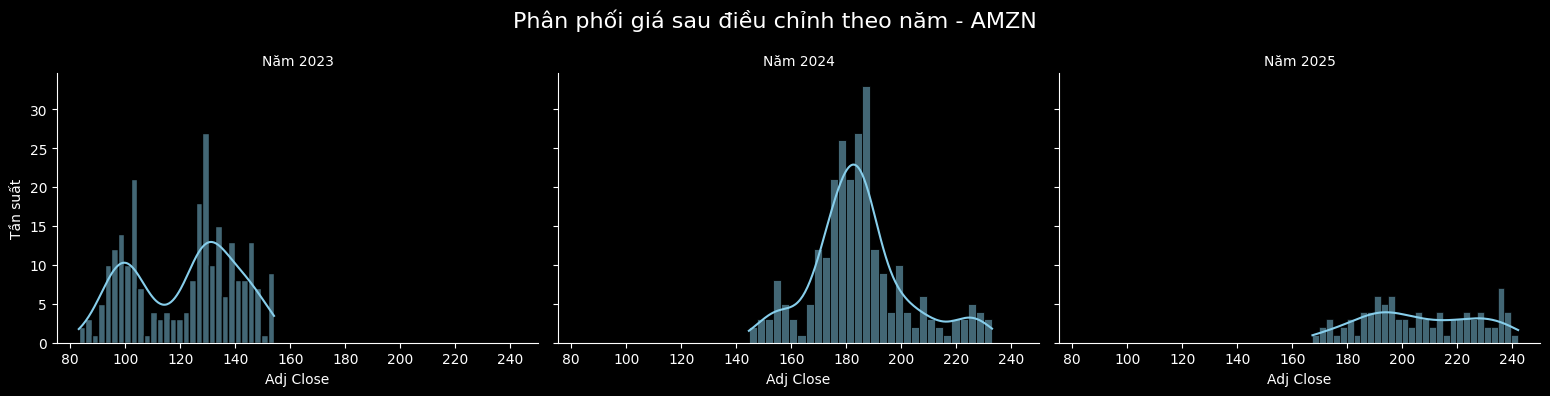

In [ ]:
for ticker in tickers:
    if ticker in etf_data_mask:
        df_ticker = etf_data_mask[ticker].copy()
        df_ticker['Year'] = df_ticker.index.year

        g = sns.FacetGrid(df_ticker, col="Year", col_wrap=3, height=4, aspect=1.3)
        g.map_dataframe(sns.histplot, x="adj_close", kde=True, bins=30, color="skyblue", edgecolor="black")
        g.set_axis_labels("Adj Close", "Tần suất")
        g.set_titles("Năm {col_name}")
        g.fig.suptitle(f'Phân phối giá sau điều chỉnh theo năm - {ticker}', fontsize=16)
        g.fig.subplots_adjust(top=0.82)
        plt.show()


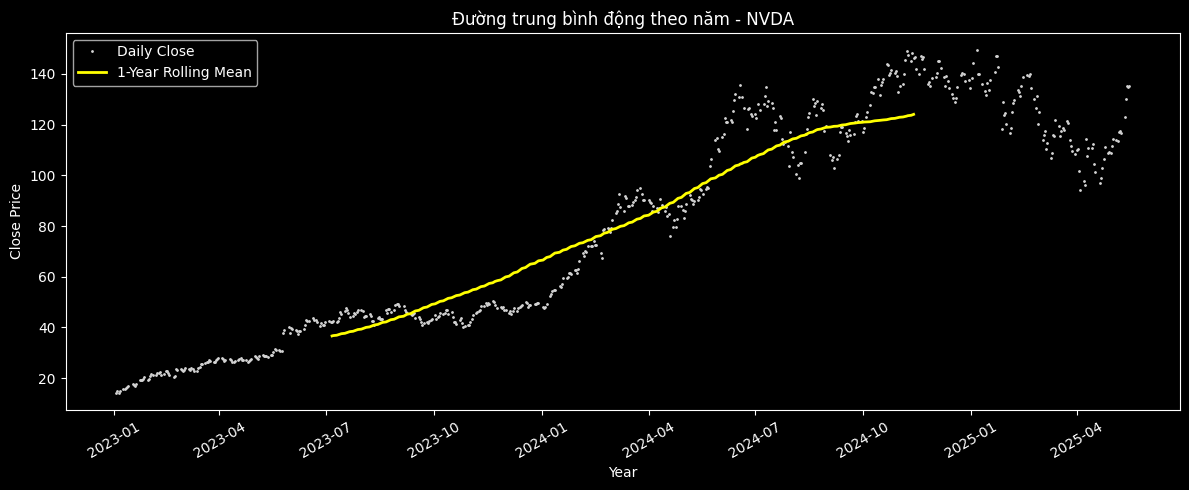

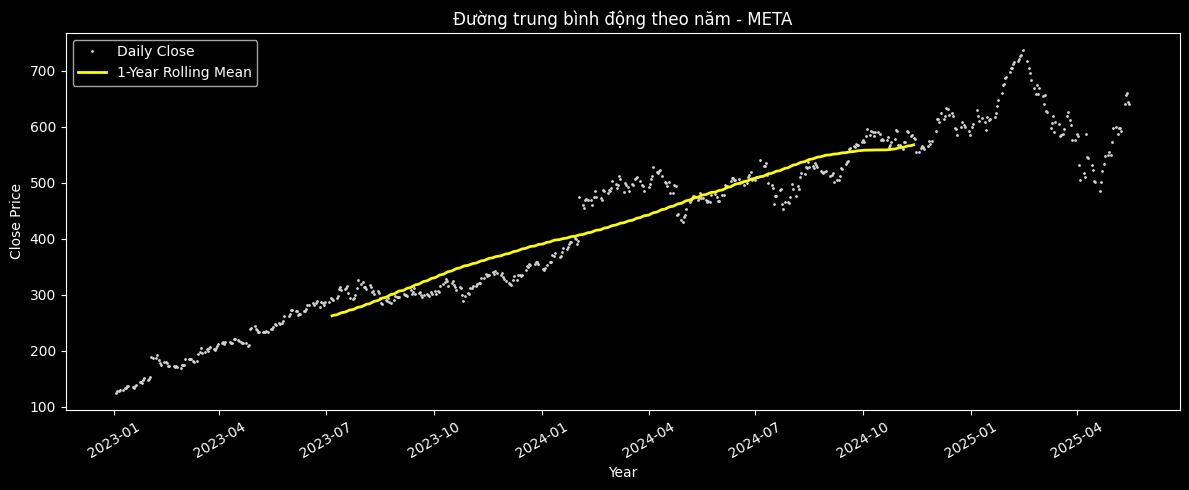

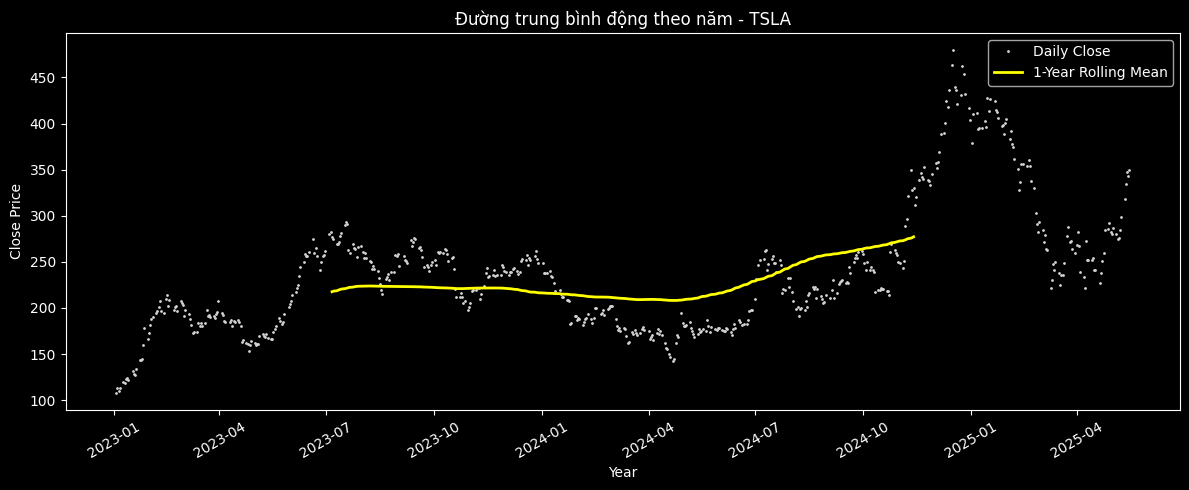

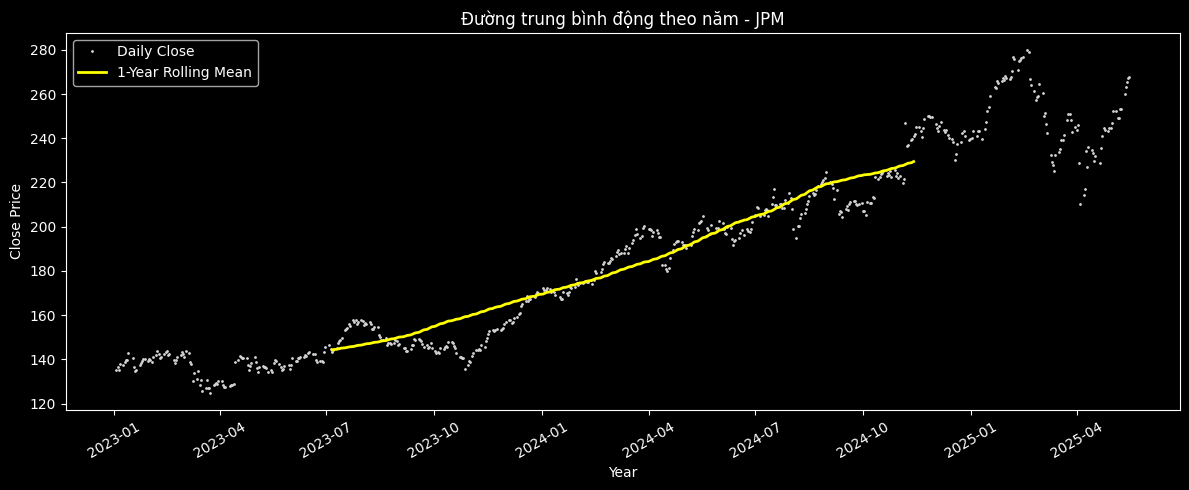

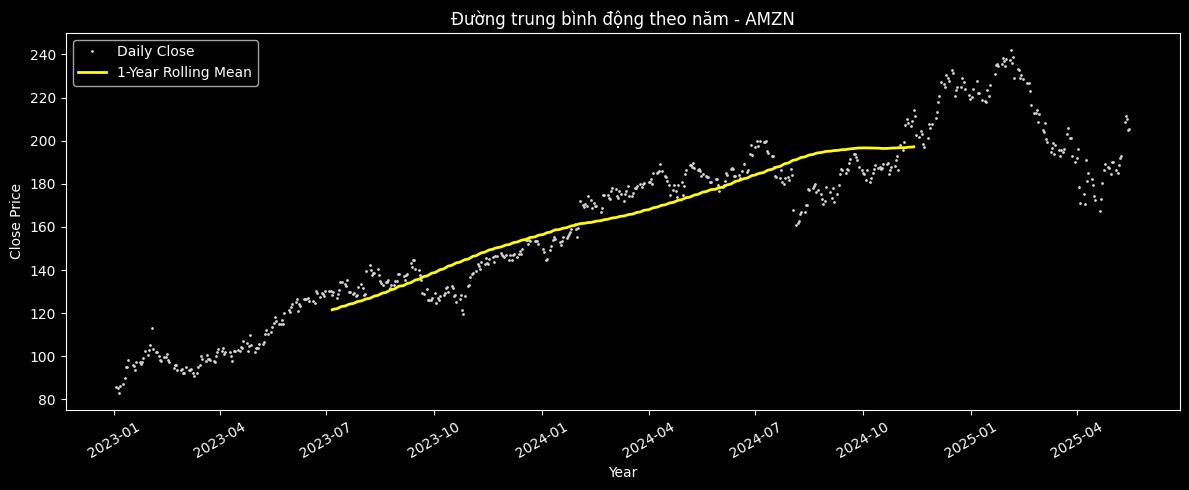

In [ ]:
for ticker in tickers:
    try:
        df_ticker = etf_data_mask[ticker].copy()
        df_ticker['rolling_1yr'] = df_ticker['close'].rolling(window=252, center=True).mean()

        fig, ax = plt.subplots(figsize=(12, 5))

        ax.plot(df_ticker.index, df_ticker['close'], marker='.', markersize=2, linestyle='None', color='lightgray', label='Daily Close')

        ax.plot(df_ticker.index, df_ticker['rolling_1yr'], linewidth=2, color='yellow', label='1-Year Rolling Mean')
        ax.set_title(f'Đường trung bình động theo năm - {ticker}', color='white')
        ax.set_xlabel('Year', color='white')
        ax.set_ylabel('Close Price', color='white')
        ax.tick_params(colors='white')

        ax.legend()
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

    except KeyError:
        print(f"Dữ liệu thiếu cho {ticker}, bỏ qua.")


In [ ]:
#print(df_ticker.loc["2023-01":"2023-07"].shape[0])

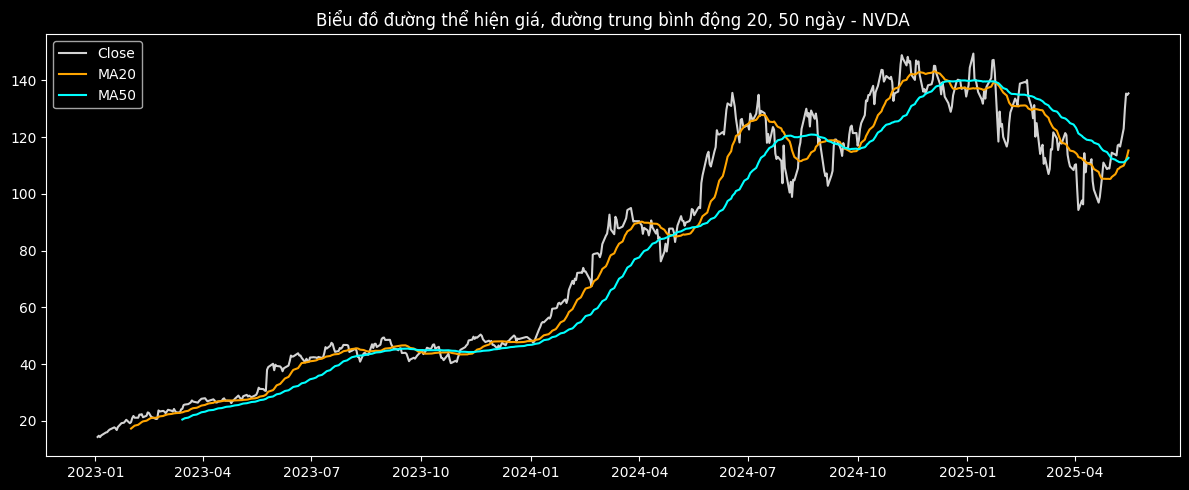

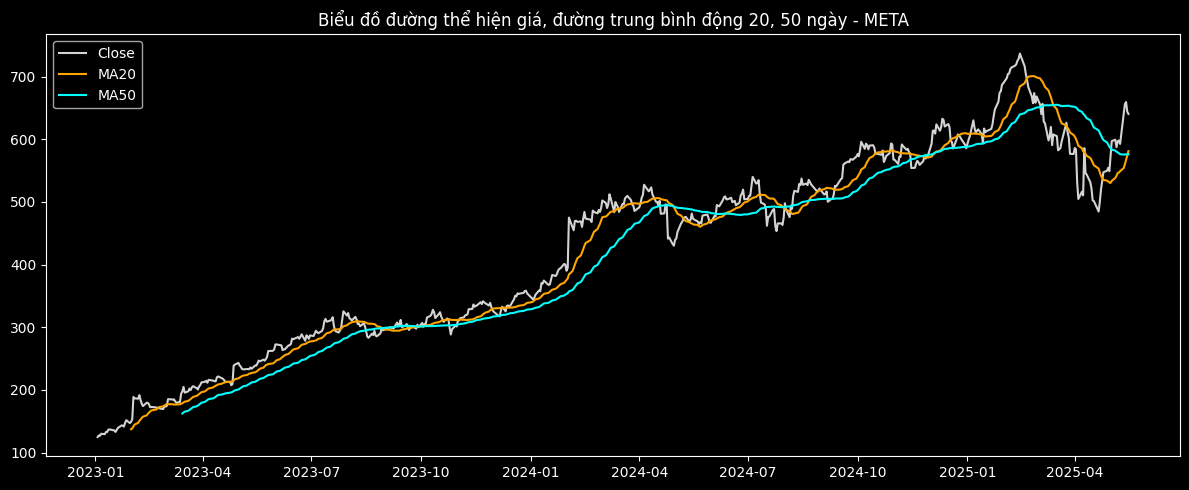

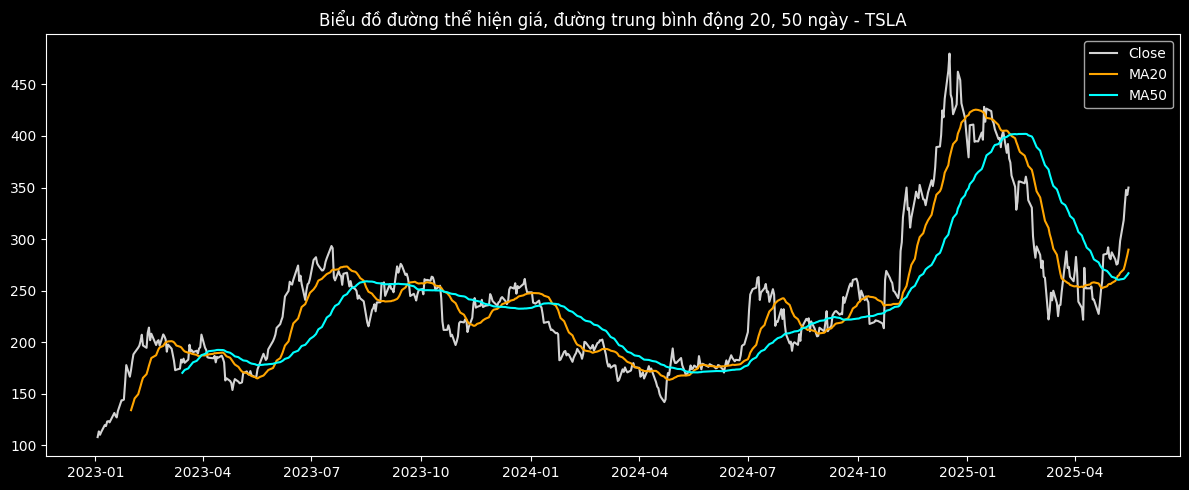

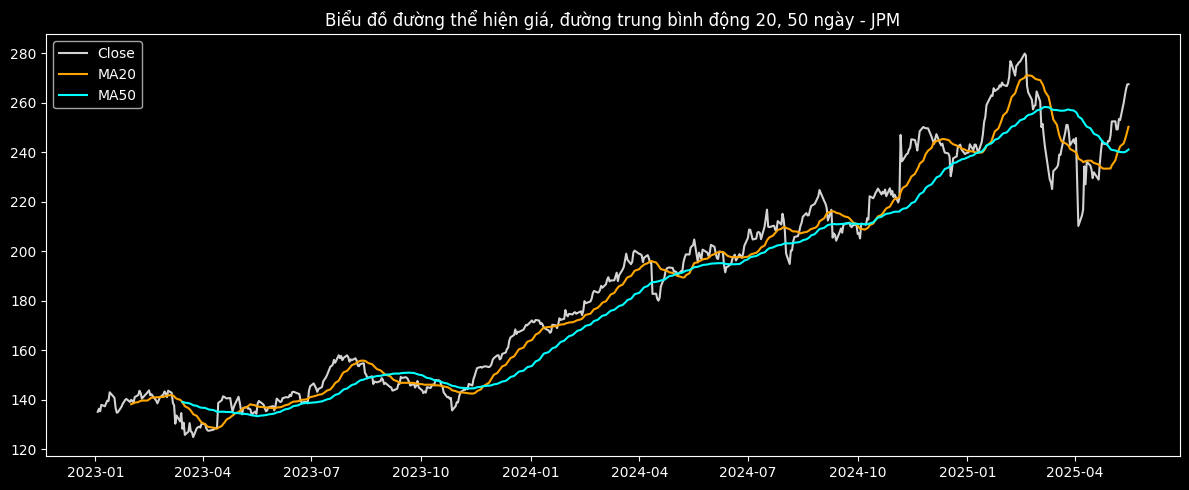

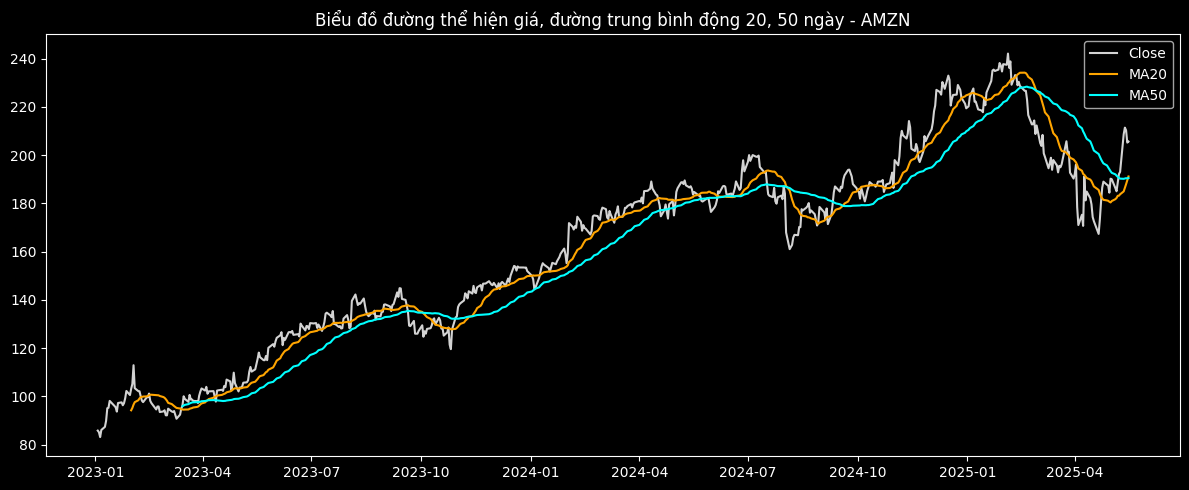

In [ ]:
for ticker in tickers:
    if ticker in etf_data_mask:
        df_ticker = etf_data_mask[ticker].copy()

        plt.figure(figsize=(12, 5))
        plt.style.use('dark_background')

        plt.plot(df_ticker['close'], label='Close', color='lightgray')
        plt.plot(df_ticker['MA20'], label='MA20', color='orange')
        plt.plot(df_ticker['MA50'], label='MA50', color='cyan')

        plt.title(f'Biểu đồ đường thể hiện giá, đường trung bình động 20, 50 ngày - {ticker}')
        plt.legend()
        plt.tight_layout()
        plt.show()

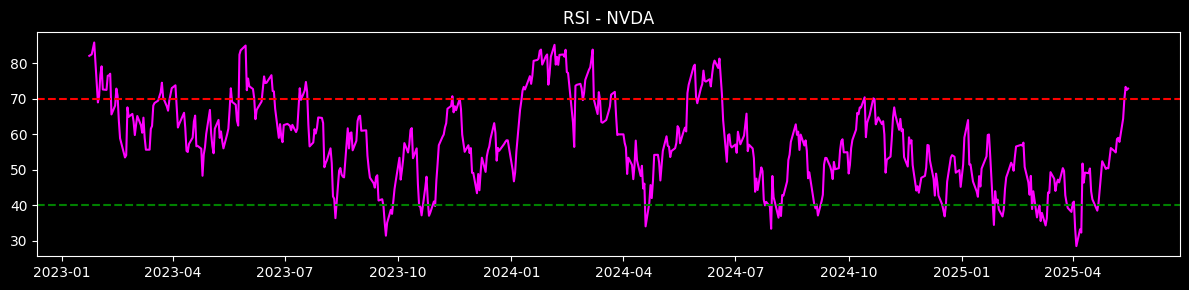

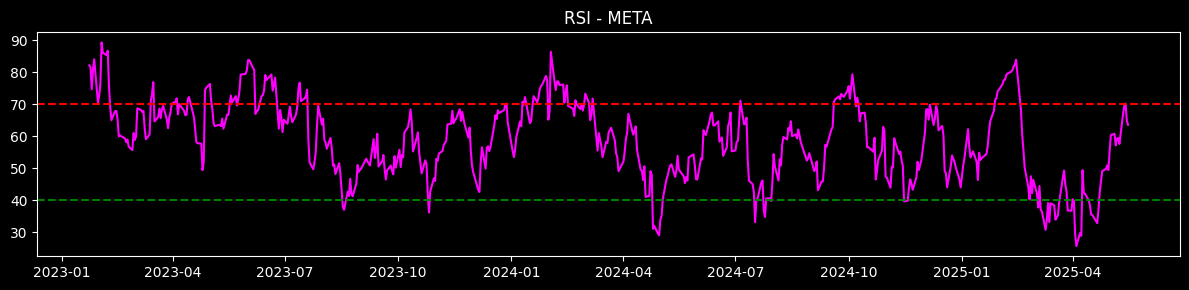

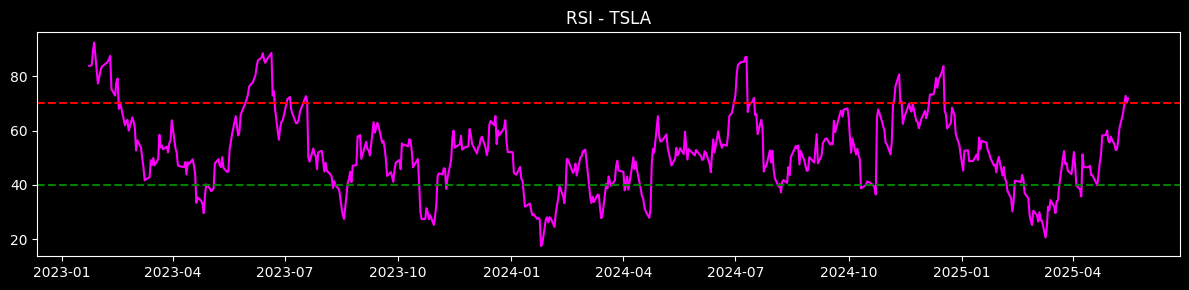

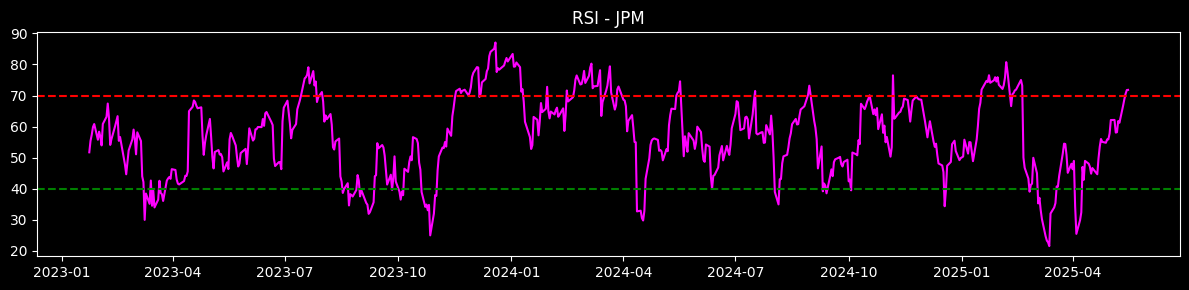

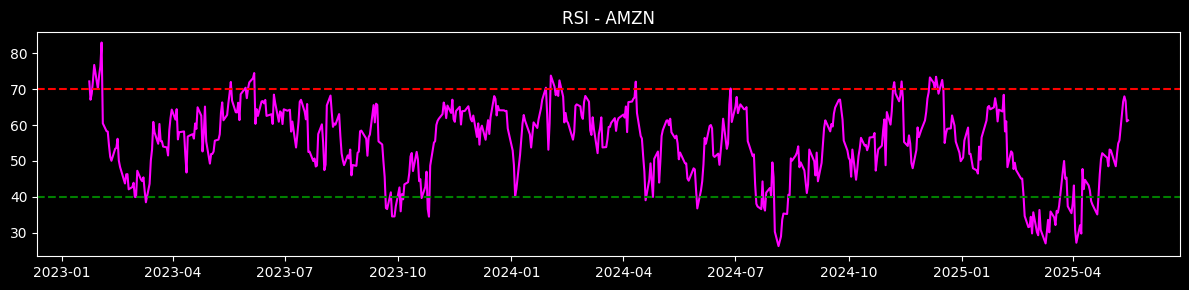

In [ ]:
for ticker in tickers:
    if ticker in etf_data_mask:
        df_ticker = etf_data_mask[ticker].copy()

        plt.figure(figsize=(12, 3))
        plt.style.use('dark_background')

        plt.plot(df_ticker['RSI'], color='magenta')
        plt.axhline(70, color='red', linestyle='--')
        plt.axhline(40, color='green', linestyle='--')

        plt.title(f'RSI - {ticker}')
        plt.tight_layout()
        plt.show()

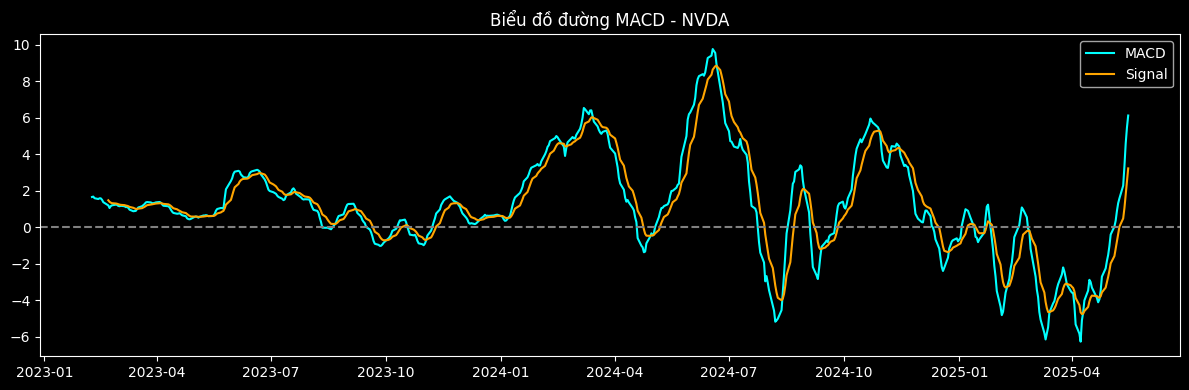

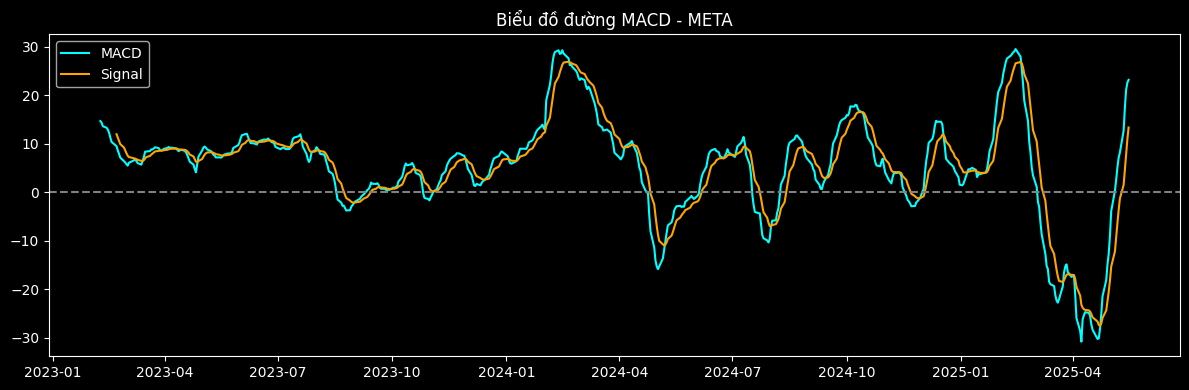

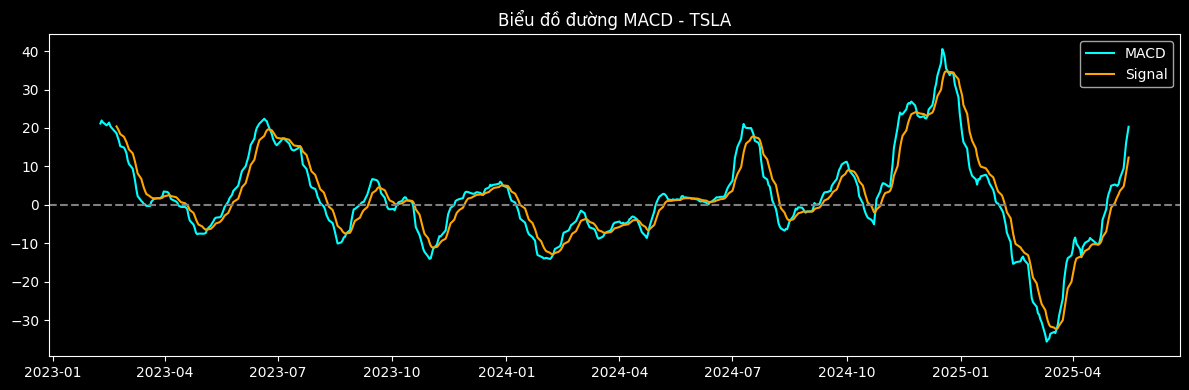

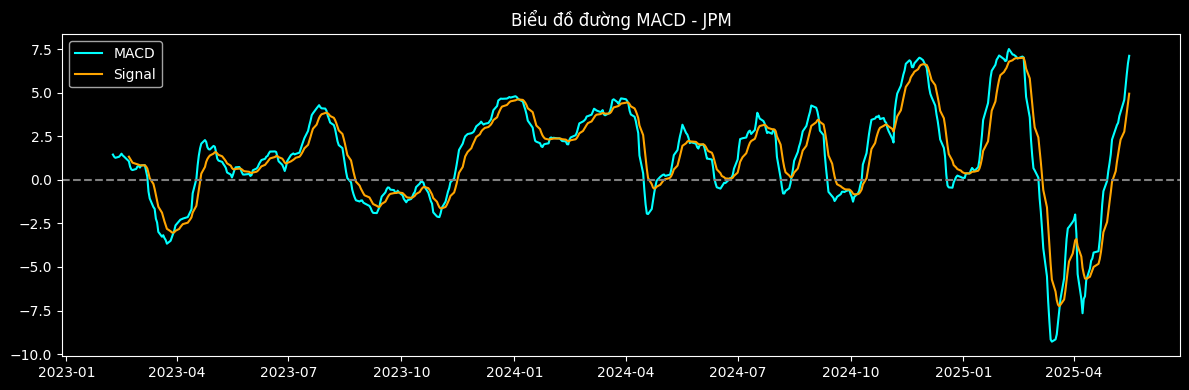

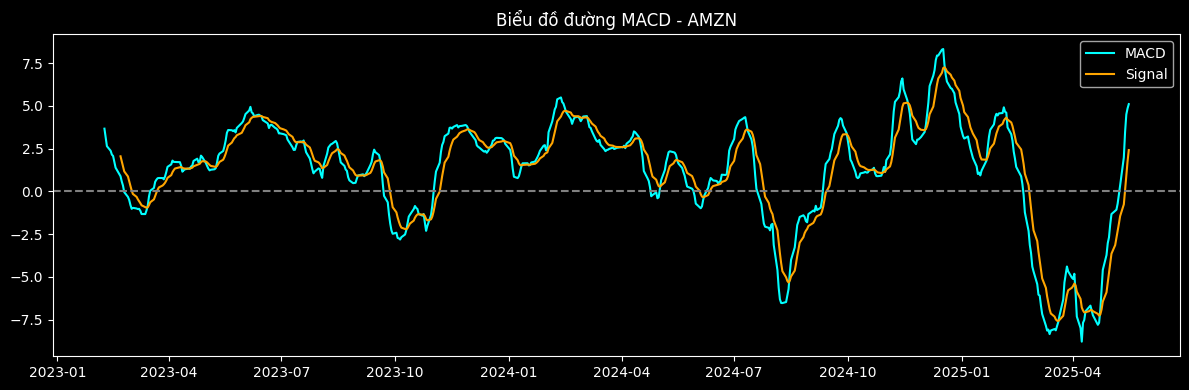

In [ ]:
for ticker in tickers:
    if ticker in etf_data_mask:
        df_ticker = etf_data_mask[ticker].copy()

        plt.figure(figsize=(12, 4))
        plt.style.use('dark_background')

        plt.plot(df_ticker['MACD'], label='MACD', color='cyan')
        plt.plot(df_ticker['MACD_signal'], label='Signal', color='orange')
        plt.axhline(0, color='gray', linestyle='--')

        plt.title(f'Biểu đồ đường MACD - {ticker}')
        plt.legend()
        plt.tight_layout()
        plt.show()

Phân kỳ giảm giá (Bearish Divergence): Khi giá tài sản tạo đỉnh cao hơn, nhưng đường MACD lại tạo đỉnh thấp hơn. Điều này cho thấy động lượng tăng giá đang suy yếu và có thể sắp đảo chiều giảm.

Phân kỳ tăng giá (Bullish Divergence): Khi giá tài sản tạo đáy thấp hơn, nhưng đường MACD lại tạo đáy cao hơn. Điều này cho thấy động lượng giảm giá đang suy yếu và có thể sắp đảo chiều tăng.

Hội tụ (Convergence): Ngược lại với phân kỳ, khi giá và MACD cùng đi theo một hướng (cùng tạo đỉnh cao hơn hoặc cùng tạo đáy thấp hơn) thì đây là tín hiệu xác nhận xu hướng hiện tại.

In [ ]:
start_date = '2024-09-01'
end_date = '2024-12-31'

In [ ]:
# Lọc dữ liệu theo khoảng thời gian
for ticker in etf_data_mask:
    df_ticker = etf_data_mask[ticker].loc[start_date:end_date]
    etf_data_mask[ticker] = df_ticker

# Số lượng mã cần vẽ
plot_symbols = tickers
num_symbols = len(plot_symbols)

# Tạo subplot
fig = make_subplots(
    rows=num_symbols,
    cols=1,
    specs=[[{'secondary_y': True}] for _ in range(num_symbols)],
    subplot_titles=plot_symbols,
    shared_xaxes=False,
)

increasing_color = 'deepskyblue'   # Giá tăng
decreasing_color = 'orange'        # Giá giảm
volume_color = 'rgba(180, 180, 180, 0.4)'  # Khối lượng giao dịch

for i, ticker in enumerate(plot_symbols):
    if ticker not in etf_data_mask:
        continue

    df_ticker = etf_data_mask[ticker].dropna()
    row = i + 1

    # Biểu đồ nến
    fig.add_trace(
        go.Candlestick(
            x=df_ticker.index,
            open=df_ticker['open'],
            high=df_ticker['high'],
            low=df_ticker['low'],
            close=df_ticker['close'],
            name=f'{ticker} Candlestick',
            increasing_line_color=increasing_color,
            decreasing_line_color=decreasing_color
        ),
        row=row, col=1, secondary_y=False
    )

    # Đường giá đóng cửa
    fig.add_trace(
        go.Scatter(
            x=df_ticker.index,
            y=df_ticker['close'],
            mode='lines',
            name=f'{ticker} Close',
            line=dict(color='lightblue', width=1),
            opacity=0.6
        ),
        row=row, col=1, secondary_y=False
    )

    # Khối lượng
    fig.add_trace(
        go.Bar(
            x=df_ticker.index,
            y=df_ticker['volume'],
            name=f'{ticker} Volume',
            marker_color=volume_color,
            opacity=0.4
        ),
        row=row, col=1, secondary_y=True
    )

fig.update_layout(
    height=300 * num_symbols,
    showlegend=False,
    title_text="Biểu đồ nến thể hiện giá, khối lượng giao dịch",
    title_x=0.5,
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

# Ẩn thanh trượt
fig.update_xaxes(rangeslider_visible=False)

# Gán nhãn trục
for i in range(num_symbols):
    fig.update_yaxes(title_text="Price", row=i + 1, col=1, secondary_y=False)
    fig.update_yaxes(title_text="Volume", row=i + 1, col=1, secondary_y=True)

# Hiển thị
fig.show()